<a href="https://colab.research.google.com/github/MHusni1604/Pengantar-Anlisis-Data-Panel/blob/main/Tugas_Minggu_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas 1

## Library

In [16]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.diagnostic import het_breuschpagan, normal_ad
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor


## Load Data

In [17]:
df = pd.read_excel("https://github.com/MHusni1604/Pengantar-Anlisis-Data-Panel/raw/main/Dataset/Panel%20Dataset.xlsx")
df.head()

,Provinsi,Tahun,Prevalensi Balita Gizi Kurang (0-59 Bulan),PDRB,Imunisasi Dasar,Presentasi Miskin,Rata Lama Pendidikan
0,ACEH,2016,14.11,136843.82,38.15,16.73,9.36
1,ACEH,2017,18.90,145806.92,23.19,16.89,9.42
2,ACEH,2018,16.80,155910.98,18.32,15.97,9.46
3,SUMATERA UTARA,2016,10.08,626062.91,47.08,10.35,9.46
4,SUMATERA UTARA,2017,13.10,684634.43,27.10,10.22,9.55


In [18]:
df.set_index(['Provinsi ', 'Tahun'], inplace=True)
df.head()

Prevalensi Balita Gizi Kurang (0-59 Bulan)       PDRB  \
Provinsi       Tahun                                                          
ACEH           2016                                        14.11  136843.82   
               2017                                        18.90  145806.92   
               2018                                        16.80  155910.98   
SUMATERA UTARA 2016                                        10.08  626062.91   
               2017                                        13.10  684634.43   

                      Imunisasi Dasar  Presentasi Miskin  Rata Lama Pendidikan  
Provinsi       Tahun                                                            
ACEH           2016             38.15              16.73                  9.36  
               2017             23.19              16.89                  9.42  
               2018             18.32              15.97                  9.46  
SUMATERA UTARA 2016             47.08              10.35                  9.46  
               2017             27.10              10.22                  9.55

## Statsitik Deskriptif

<Figure size 1000x600 with 0 Axes>

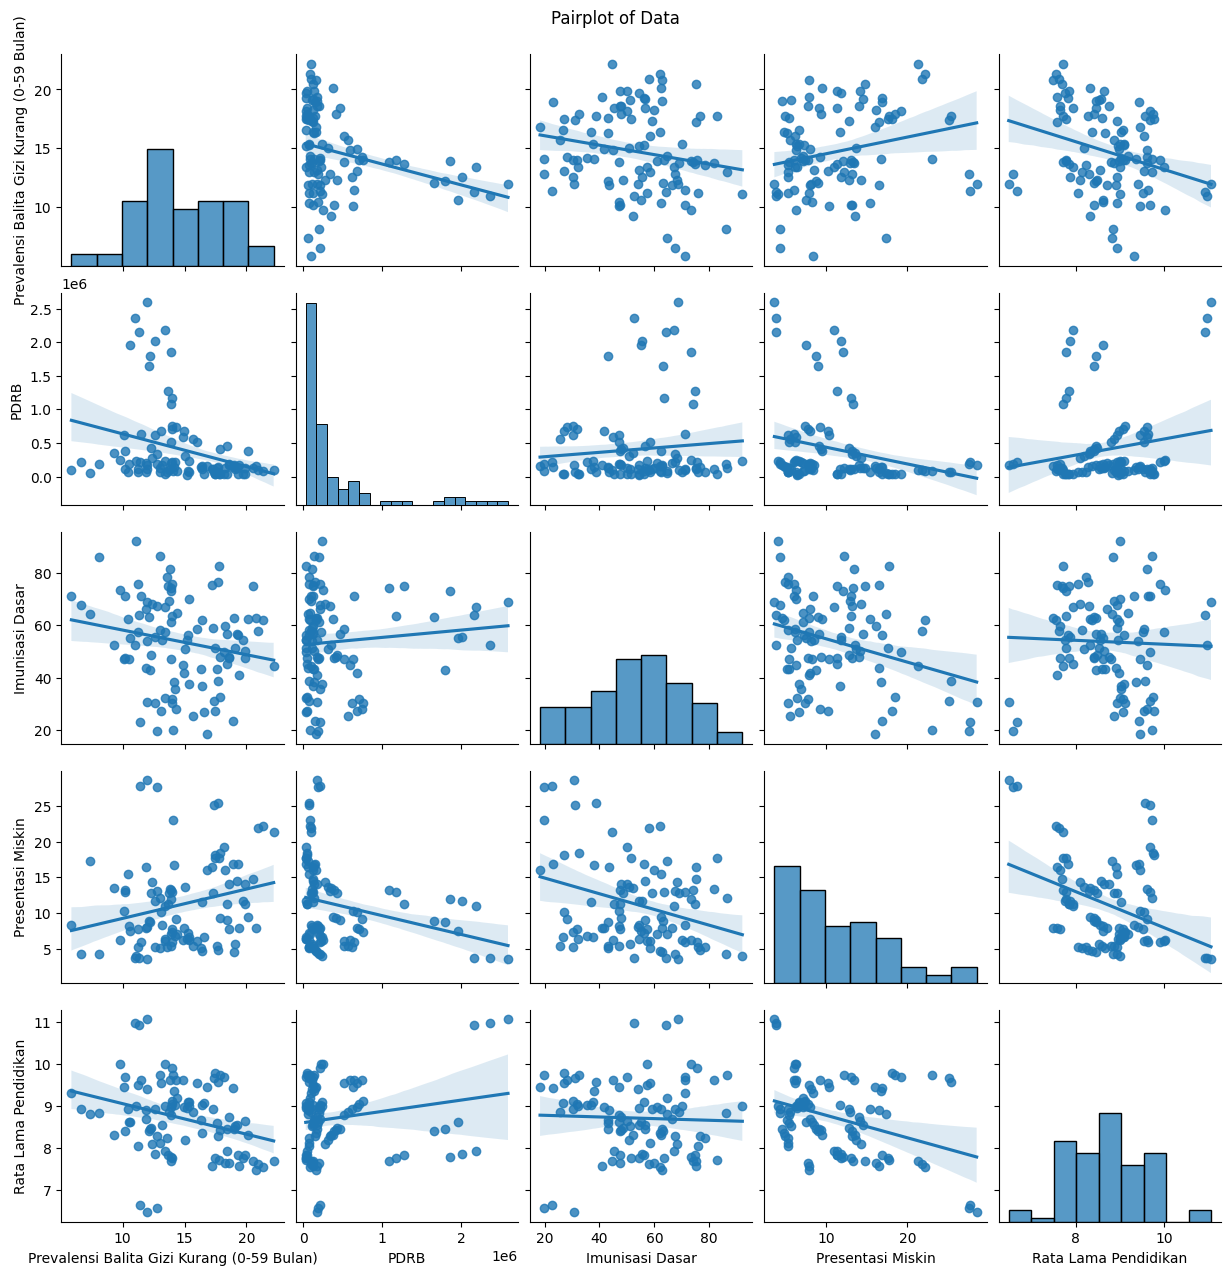

In [19]:
plt.figure(figsize=(10, 6))
sns.pairplot(df, kind='reg')
plt.suptitle('Pairplot of Data', y=1.02)
plt.show()

In [20]:
df.describe(include='all')

,Prevalensi Balita Gizi Kurang (0-59 Bulan),PDRB,Imunisasi Dasar,Presentasi Miskin,Rata Lama Pendidikan
count,102.000000,1.020000e+02,102.000000,102.000000,102.000000
mean,14.726961,4.053376e+05,53.710392,11.210882,8.713824
std,3.489348,5.791373e+05,16.939769,5.947272,0.866379
min,5.860000,2.915060e+04,18.320000,3.570000,6.480000
25%,12.225000,9.231789e+04,43.180000,6.335000,8.107500
50%,14.050000,1.691676e+05,54.765000,9.390000,8.765000
75%,17.697500,4.184412e+05,65.972500,14.252500,9.347500
max,22.200000,2.592607e+06,92.100000,28.540000,11.060000


## Analisis Cross-Sectional

In [21]:
X = df[['PDRB', 'Imunisasi Dasar', 'Presentasi Miskin', 'Rata Lama Pendidikan',]]
y = df['Prevalensi Balita Gizi Kurang (0-59 Bulan)']

In [22]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                                        OLS Regression Results                                        
Dep. Variable:     Prevalensi Balita Gizi Kurang (0-59 Bulan)   R-squared:                       0.180
Model:                                                    OLS   Adj. R-squared:                  0.146
Method:                                         Least Squares   F-statistic:                     5.310
Date:                                        Thu, 03 Apr 2025   Prob (F-statistic):           0.000656
Time:                                                12:04:17   Log-Likelihood:                -261.60
No. Observations:                                         102   AIC:                             533.2
Df Residuals:                                              97   BIC:                             546.3
Df Model:                                                   4                                         
Covariance Type:                                    nonrobust            

Normality p-value: 0.08712617527386211


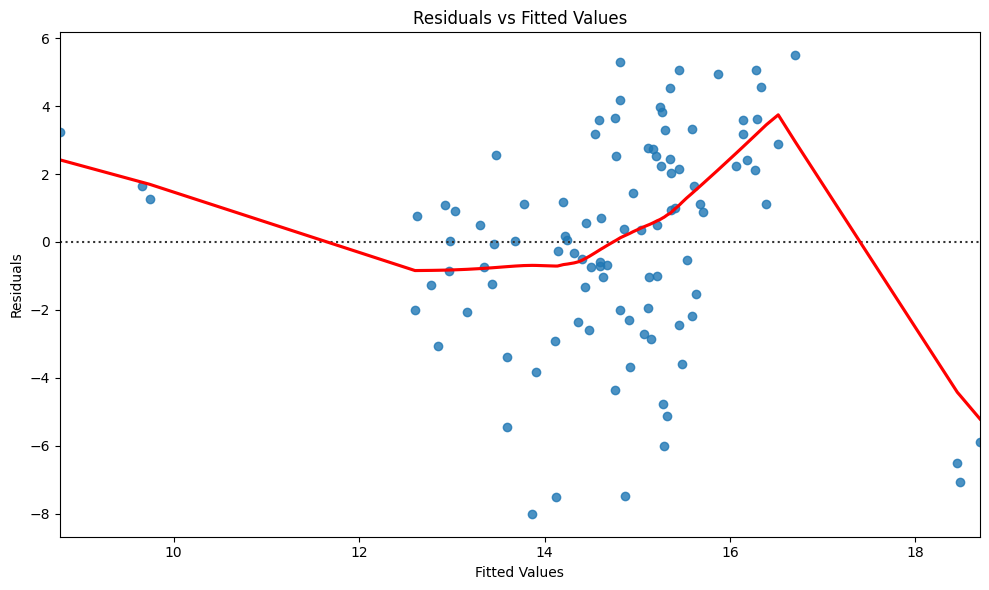

In [23]:
# Normalitas Residual
plt.figure(figsize=(10, 6))
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.tight_layout()

normality_pval = normal_ad(model.resid)[1]
print(f"Normality p-value: {normality_pval}")

In [24]:
# Homokedastisitas (Breusch-Pagan Test)
bp_test = het_breuschpagan(model.resid, model.model.exog)
bp_pval = bp_test[1]
print(f"Breusch-Pagan p-value: {bp_pval}")

Breusch-Pagan p-value: 0.001643966782249695


In [25]:
# Autocorrelation (Durbin-Watson test)
dw_stat = durbin_watson(model.resid)
print(f"Durbin-Watson statistic: {dw_stat}")

Durbin-Watson statistic: 0.623737004024891


In [26]:
# Multicollinearity (VIF)
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                feature         VIF
0                 const  176.217719
1                  PDRB    1.080741
2       Imunisasi Dasar    1.143682
3     Presentasi Miskin    1.362729
4  Rata Lama Pendidikan    1.202381


In [27]:
X = sm.add_constant(X)
model = sm.OLS(np.log(y), X).fit()
print(model.summary())

                                        OLS Regression Results                                        
Dep. Variable:     Prevalensi Balita Gizi Kurang (0-59 Bulan)   R-squared:                       0.158
Model:                                                    OLS   Adj. R-squared:                  0.123
Method:                                         Least Squares   F-statistic:                     4.558
Date:                                        Thu, 03 Apr 2025   Prob (F-statistic):            0.00204
Time:                                                12:04:18   Log-Likelihood:                 3.5271
No. Observations:                                         102   AIC:                             2.946
Df Residuals:                                              97   BIC:                             16.07
Df Model:                                                   4                                         
Covariance Type:                                    nonrobust            

Normality p-value: 8.226936026717328e-05


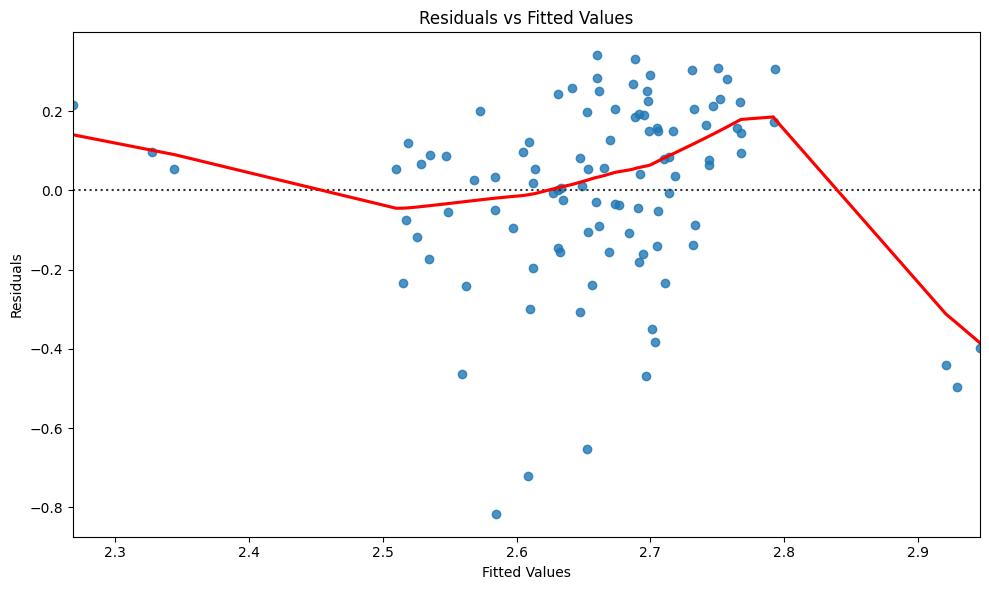

In [28]:
# Normalitas Residual
plt.figure(figsize=(10, 6))
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.tight_layout()

normality_pval = normal_ad(model.resid)[1]
print(f"Normality p-value: {normality_pval}")

In [29]:
# Homokedastisitas (Breusch-Pagan Test)
bp_test = het_breuschpagan(model.resid, model.model.exog)
bp_pval = bp_test[1]
print(f"Breusch-Pagan p-value: {bp_pval}")

Breusch-Pagan p-value: 0.11859719493168028


In [30]:
# Autocorrelation (Durbin-Watson test)
dw_stat = durbin_watson(model.resid)
print(f"Durbin-Watson statistic: {dw_stat}")

Durbin-Watson statistic: 0.7982772060979108


In [31]:
# Multicollinearity (VIF)
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                feature         VIF
0                 const  176.217719
1                  PDRB    1.080741
2       Imunisasi Dasar    1.143682
3     Presentasi Miskin    1.362729
4  Rata Lama Pendidikan    1.202381


## Analisis Time Series

Text(0.5, 0, 'Tahun')

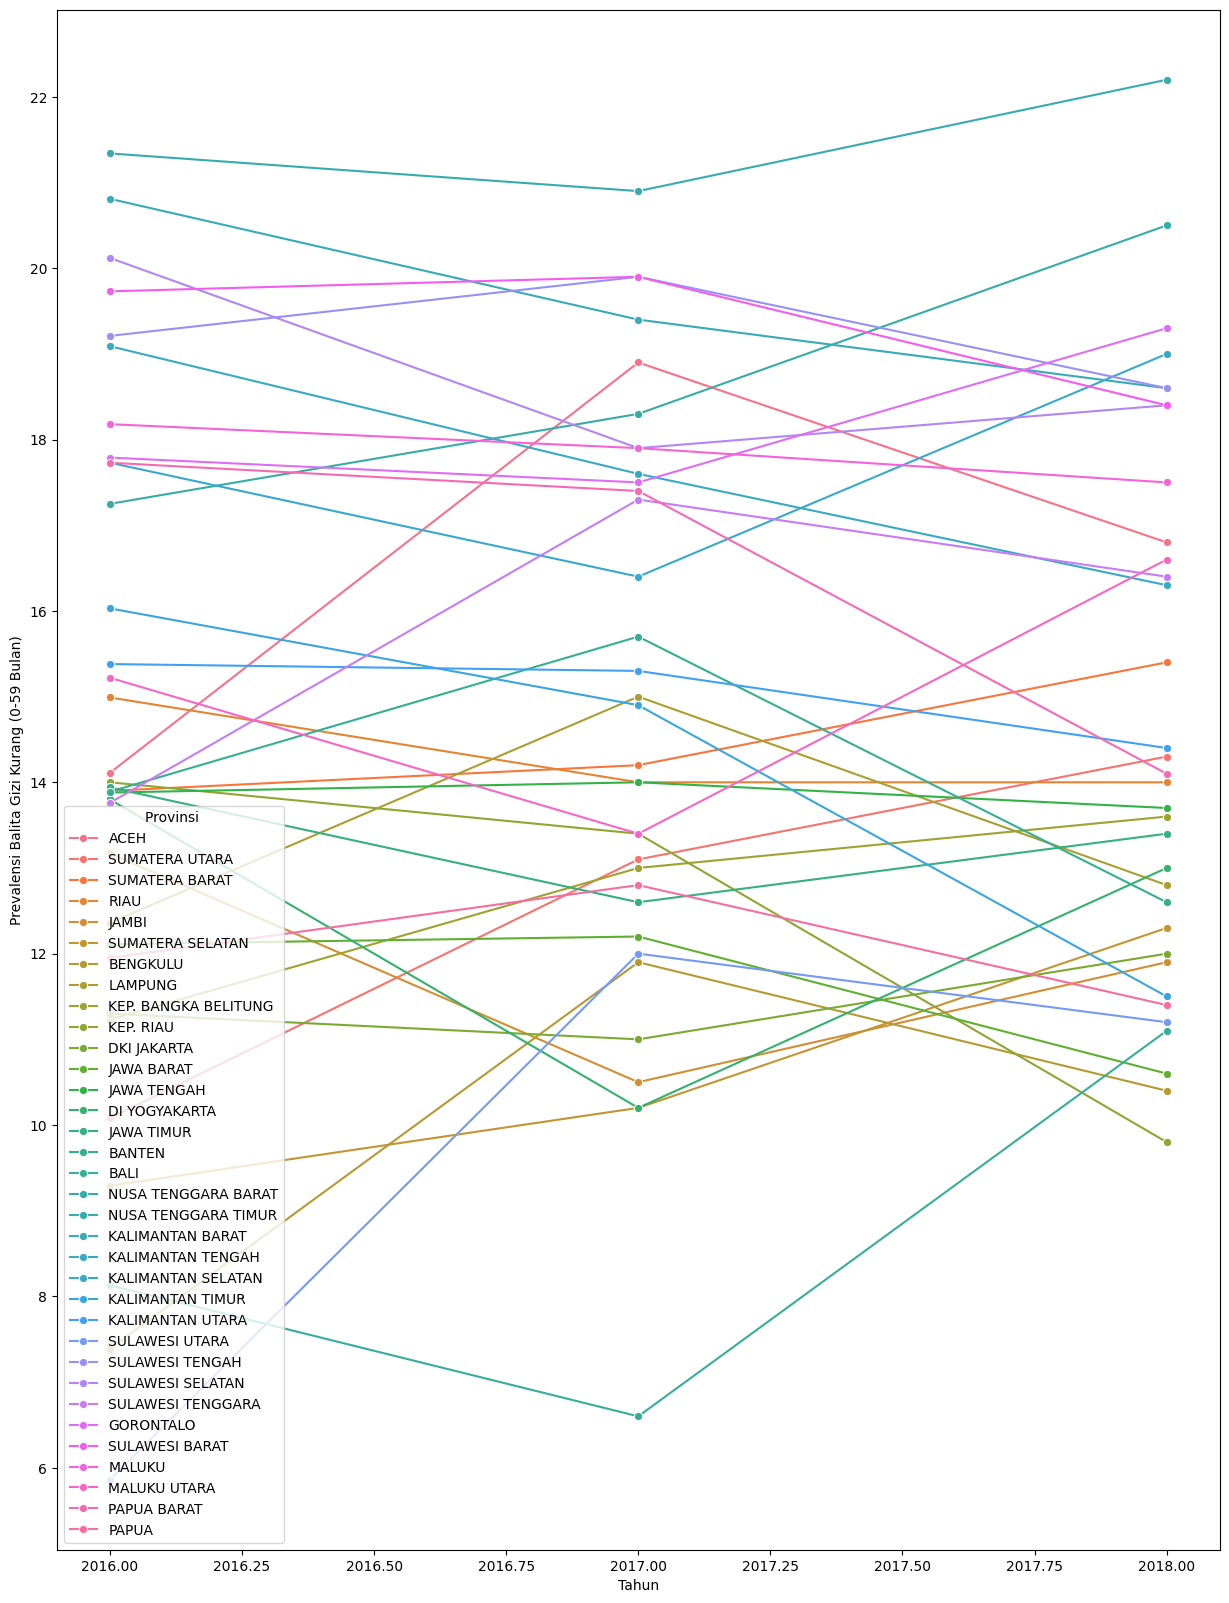

In [32]:
plt.figure(figsize=(15, 20))
sns.lineplot(data=df.reset_index(), x='Tahun', y='Prevalensi Balita Gizi Kurang (0-59 Bulan)', hue='Provinsi ', marker='o')
plt.xlabel('Tahun')